In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import time

In [2]:
import numpy as np
import pandas as pd
#df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
df = pd.read_csv('data/fashion_half.csv', delimiter=',', quotechar='"')

In [3]:
df.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
2,5,4,0,0,0,5,4,5,5,3,...,7,8,7,4,3,7,5,0,0,0
3,6,4,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
4,8,4,0,0,0,0,0,0,3,2,...,1,0,0,0,0,0,0,0,0,0


In [3]:
features = df.loc[:,"pixel1":"pixel784"]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.25)


In [6]:
#change the number of hidden layers
num_layers = range(0,20)

train_acc = []
test_acc = []


for i in num_layers:
    print(i)
    hidden_layer = tuple([15]*i)
    est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=550, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
    est.fit(X_train, y_train)
    train_acc.append((accuracy_score(y_train, est.predict(X_train))))
    test_acc.append((accuracy_score(y_test, est.predict(X_test))))


    
   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


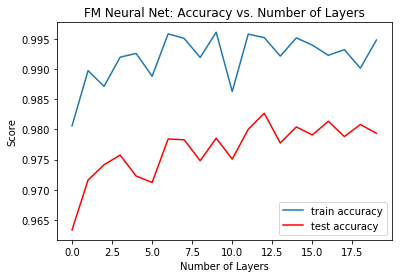

In [8]:
#estimators graph
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Neural Net: Accuracy vs. Number of Layers')
#plt.ylim((0.9,1))
ps=num_layers

plt.plot(ps, list(train_acc), '-', label='train accuracy')
plt.plot(ps, list(test_acc),linestyle='-', label='test accuracy ', color='red')


plt.xlabel("Number of Layers")
plt.ylabel("Score")

plt.legend()
plt.show()

In [73]:
train_precision

[0.8431425515776653,
 0.7640830502531438,
 0.8865495779154005,
 0.8446887379478369,
 0.8328961031490103,
 0.7768261415792519,
 0.8956079581310409,
 0.8946863648569281,
 0.9133340212629337,
 0.9032797642092397,
 0.9186616040767005,
 0.9151362535699988,
 0.8988781939126824,
 0.916190851648552,
 0.9067519222715885]

In [74]:
train_recall

[0.8326913857969348,
 0.7492377686458849,
 0.8792237228585875,
 0.846191586619287,
 0.826235141124703,
 0.7761421617332515,
 0.8947089138826844,
 0.8931724835994344,
 0.9129145011308066,
 0.9036915176970514,
 0.9172409802373647,
 0.9150353101549562,
 0.8989178678188731,
 0.9147829999481306,
 0.9053850134138839]

In [95]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [88]:
prediction = mlp.predict(X_test)

In [89]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
accuracy_score(y_test, prediction)

0.11888111888111888

In [90]:
f1_score(y_test, prediction)

0.20253164556962025

In [6]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
#change the number of hidden epochs
num_epochs = range(1,701, 50)

train_acc = []
test_acc = []


for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*14)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(X_train,y_train)
    prediction_test = mlp.predict(X_test)
    prediction_train = mlp.predict(X_train)
    train_acc.append((accuracy_score(y_train, prediction_train)))
    test_acc.append((accuracy_score(y_test, prediction_test)))

  
    
    

1


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101
151
201
251
301
351
401
451
501
551
601
651


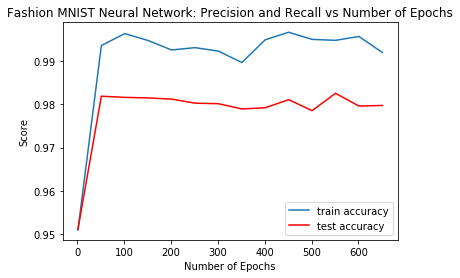

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion MNIST Neural Network: Precision and Recall vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('plots/precision_accuracy_neural_net_num_epochs_fashion')
plt.legend()
plt.show()
#ideal number of layers is 2 layer

In [137]:
train_f1

[0.0,
 0.8664495114006514,
 0.5259515570934256,
 0.8982456140350876,
 0.8982456140350876,
 0.0,
 0.3359375,
 0.86,
 0.5253940455341506,
 0.9023569023569024,
 0.89419795221843,
 0.8896797153024911]

In [12]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#change the number of hidden epochs
num_epochs = range(1,701, 50)

train_acc = []
test_acc = []

active = ['identity', 'logistic', 'tanh', 'relu']

portions = range(10, 101, 10)

for i in active:
    print(i)
    ker_train_acc = []
    ker_test_acc = []

    ker_train_recall = []
    ker_test_recall = []

    
    for count, o in enumerate(portions):
        end = int(len(X_train)* o/100.0)

        print ('portions=' + str(o) + str(i))
        
        hidden_layer = tuple([15]*8)
        mlp = MLPClassifier(activation=i, alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=False)
        mlp.fit(X_train[:end],y_train[:end])
        prediction_test = mlp.predict(X_test)
        prediction_train = mlp.predict(X_train[:end])
        
        ker_train_acc.append(accuracy_score(y_train[:end], prediction_train))
        ker_test_acc.append(accuracy_score(y_test, prediction_test))

        print(confusion_matrix(y_test,  prediction_test))


    train_acc.append(ker_train_acc)
    test_acc.append(ker_test_acc)

  
    
    

identity
portions=10identity
[[1426   31   18   36   12]
 [  21 1397   17    0    8]
 [  31   31 1436   41    1]
 [  38    9   31 1380   26]
 [   1    2    1    9 1497]]
portions=20identity
[[1447   11   16   41    8]
 [  17 1415    6    2    3]
 [  26   12 1470   32    0]
 [  24    6   25 1408   21]
 [   1    0    0    4 1505]]
portions=30identity
[[1418   42   40   18    5]
 [   9 1426    6    0    2]
 [  12   25 1487   16    0]
 [  26   18   47 1385    8]
 [   0    0    0    4 1506]]
portions=40identity
[[1431   20   33   32    7]
 [  15 1417    4    1    6]
 [  10   12 1499   19    0]
 [  22   12   26 1412   12]
 [   0    0    0    3 1507]]
portions=50identity
[[1448   15   25   31    4]
 [  11 1423    7    1    1]
 [  16    7 1498   19    0]
 [  25    6   23 1423    7]
 [   0    0    0    3 1507]]
portions=60identity
[[1466   26    8   18    5]
 [   9 1429    1    1    3]
 [  28   21 1473   18    0]
 [  64    7   17 1383   13]
 [   1    1    0    3 1505]]
portions=70identity
[[147

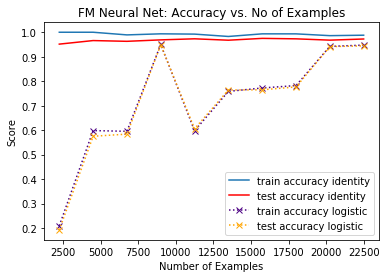

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Neural Net: Accuracy vs. No of Examples')
#plt.ylim((0.9,1))
ps=[int(len(X_train)* p/100.0) for p in portions]

ps = [int(len(X_train)* p/100.0) for p in portions]

plt.plot(ps, list(train_acc[0]), label='train accuracy identity', linestyle='-')

plt.plot(ps, list(test_acc[0]), color='red',  label='test accuracy identity',linestyle='-')

plt.plot(ps, list(train_acc[1]), 'x', color='indigo', label='train accuracy logistic', linestyle=':')
plt.plot(ps, list(test_acc[1]),'x',color='orange',  label='test accuracy logistic',linestyle=':')




plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

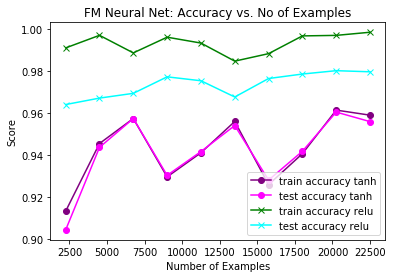

In [28]:
plt.figure()
plt.title('FM Neural Net: Accuracy vs. No of Examples')

plt.plot(ps, list(train_acc[2]), 'o', color='purple', label='train accuracy tanh', linestyle='-')
plt.plot(ps, list(test_acc[2]),'o',color='magenta',  label='test accuracy tanh',linestyle='-')
plt.xlabel("Number of Examples")
plt.ylabel("Score")

plt.plot(ps, list(train_acc[3]), 'x', color='green', label='train accuracy relu', linestyle='-')
plt.plot(ps, list(test_acc[3]),'x',color='cyan',  label='test accuracy relu',linestyle='-')

plt.legend()
plt.show()


In [30]:
test_acc[0]

[0.9514666666666667,
 0.966,
 0.9629333333333333,
 0.9688,
 0.9732,
 0.9674666666666667,
 0.9749333333333333,
 0.9730666666666666,
 0.9677333333333333,
 0.9724]

In [31]:
test_acc[1]

[0.1924,
 0.5750666666666666,
 0.5837333333333333,
 0.9482666666666667,
 0.6057333333333333,
 0.764,
 0.7648,
 0.7765333333333333,
 0.9412,
 0.9444]

In [32]:
test_acc[2]

[0.9044,
 0.9437333333333333,
 0.9574666666666667,
 0.9304,
 0.9417333333333333,
 0.9541333333333334,
 0.9281333333333334,
 0.9418666666666666,
 0.9605333333333334,
 0.956]

In [34]:
test_acc[3]

[0.9641333333333333,
 0.9672,
 0.9694666666666667,
 0.9773333333333334,
 0.9754666666666667,
 0.9677333333333333,
 0.9765333333333334,
 0.9786666666666667,
 0.9802666666666666,
 0.9797333333333333]

In [38]:

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=200, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=False)
mlp.fit(X_train,y_train)
prediction_test = mlp.predict(X_test)
prediction_train = mlp.predict(X_train)
cm= confusion_matrix(y_test,  prediction_test)


NameError: name 'cmap' is not defined

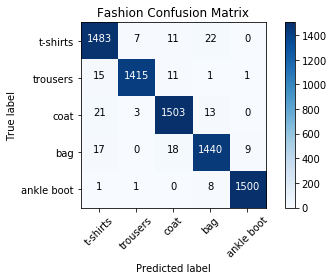

In [48]:
import itertools

cmap=plt.cm.Blues
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Fashion Confusion Matrix")
plt.colorbar()
classes = [ 't-shirts', 'trousers', 'coat', 'bag', 'ankle boot']
tick_marks = np.arange(5)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()